In [7]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
import sqlite3

# Créer une base test temporaire pour vérifier SQLite
test_conn = sqlite3.connect("../sql/test.db")
cursor = test_conn.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS test_table(id INTEGER)")
test_conn.commit()
test_conn.close()

print("SQLite fonctionne parfaitement !")

SQLite fonctionne parfaitement !


In [ ]:
import sqlite3
import pandas as pd

# Connexion principale pour le projet
conn = sqlite3.connect("../sql/python_sql_movie_analysis.db")  # ou juste "python_sql_movie_analysis.db"

# Charger les CSV dans des DataFrames
users = pd.read_csv("../data/u.user", sep="|", names=["user_id","age","gender","occupation","zip_code"])
movies = pd.read_csv("../data/u.item", sep="|", names=["movie_id","title","release_date","video_release_date","imdb_url",
                                                       "unknown","Action","Adventure","Animation","Children","Comedy","Crime",
                                                       "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery",
                                                       "Romance","Sci-Fi","Thriller","War","Western"], encoding="latin-1")
ratings = pd.read_csv("../data/u.data", sep="\t", names=["user_id","movie_id","rating","timestamp"])

# Charger les tables dans SQLite
users.to_sql("users", conn, if_exists="replace", index=False)
movies.to_sql("movies", conn, if_exists="replace", index=False)
ratings.to_sql("ratings", conn, if_exists="replace", index=False)

print("Tables importées avec succès !")

Tables importées avec succès !


In [ ]:
# Top 5 films les mieux notés

query = """
SELECT m.title, AVG(r.rating) as avg_rating, COUNT(r.rating) as n_ratings
FROM ratings r
JOIN movies m ON r.movie_id = m.movie_id
GROUP BY m.title
HAVING COUNT(r.rating) >= 20
ORDER BY avg_rating DESC
LIMIT 5;
"""
top_movies = pd.read_sql(query, conn)
print(top_movies)

                                               title  avg_rating  n_ratings
0                              Close Shave, A (1995)    4.491071        112
1                            Schindler's List (1993)    4.466443        298
2                         Wrong Trousers, The (1993)    4.466102        118
3                                  Casablanca (1942)    4.456790        243
4  Wallace & Gromit: The Best of Aardman Animatio...    4.447761         67


In [11]:
# Utilisateurs les plus actifs

query = """
SELECT user_id, COUNT(*) as n_ratings
FROM ratings
GROUP BY user_id
ORDER BY n_ratings DESC
LIMIT 5;
"""
top_users = pd.read_sql(query, conn)
print(top_users)


   user_id  n_ratings
0      405        737
1      655        685
2       13        636
3      450        540
4      276        518


In [12]:
# Distribution des notes par valeurs

query = "SELECT rating, COUNT(*) as n FROM ratings GROUP BY rating ORDER BY rating"
rating_dist = pd.read_sql(query, conn)
print(rating_dist)

   rating      n
0       1   6110
1       2  11370
2       3  27145
3       4  34174
4       5  21201


In [ ]:
# Top 5 des genres les plus populaires

query = """
SELECT 
    SUM(Action) as Action,
    SUM(Adventure) as Adventure,
    SUM(Animation) as Animation,
    SUM(Children) as Children,
    SUM(Comedy) as Comedy,
    SUM(Crime) as Crime,
    SUM(Documentary) as Documentary,
    SUM(Drama) as Drama,
    SUM(Fantasy) as Fantasy,
    SUM(`Film-Noir`) as FilmNoir,
    SUM(Horror) as Horror,
    SUM(Musical) as Musical,
    SUM(Mystery) as Mystery,
    SUM(Romance) as Romance,
    SUM(`Sci-Fi`) as SciFi,
    SUM(Thriller) as Thriller,
    SUM(War) as War,
    SUM(Western) as Western
FROM movies
"""
genre_counts = pd.read_sql(query, conn)
print(genre_counts.T.sort_values(by=0, ascending=False).head(5))


            0
Drama     725
Comedy    505
Thriller  251
Action    251
Romance   247


In [14]:
# Top 5 des films les plus noté

query = """
SELECT m.title, COUNT(r.rating) as n_ratings
FROM ratings r
JOIN movies m ON r.movie_id = m.movie_id
GROUP BY m.title
ORDER BY n_ratings DESC
LIMIT 5;
"""
most_rated_movies = pd.read_sql(query, conn)
print(most_rated_movies)


                       title  n_ratings
0           Star Wars (1977)        583
1             Contact (1997)        509
2               Fargo (1996)        508
3  Return of the Jedi (1983)        507
4           Liar Liar (1997)        485


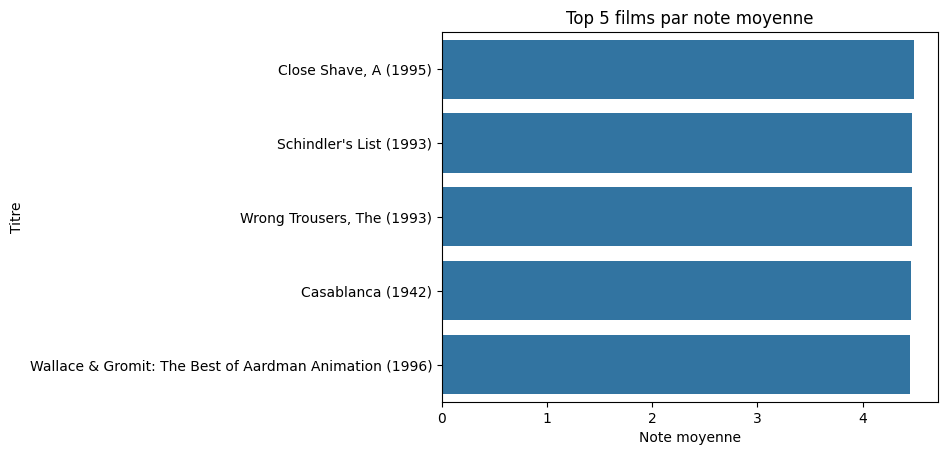

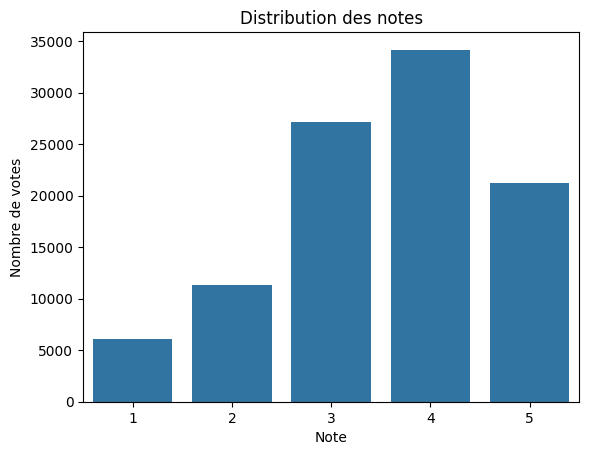

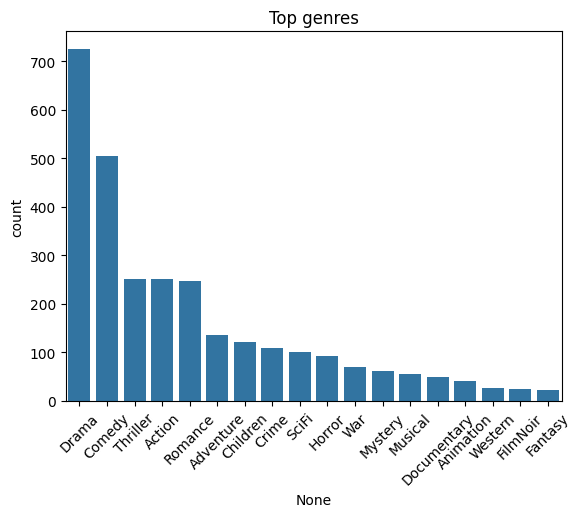

In [15]:
# Visualisation avec Python / Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Top films par note moyenne
sns.barplot(x="avg_rating", y="title", data=top_movies)
plt.title("Top 5 films par note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Titre")
plt.show()

# Distribution des notes
sns.barplot(x="rating", y="n", data=rating_dist)
plt.title("Distribution des notes")
plt.xlabel("Note")
plt.ylabel("Nombre de votes")
plt.show()

# Top genres
genre_counts_t = genre_counts.T
genre_counts_t.columns = ["count"]
genre_counts_t = genre_counts_t.sort_values(by="count", ascending=False)
sns.barplot(x=genre_counts_t.index, y="count", data=genre_counts_t)
plt.title("Top genres")
plt.xticks(rotation=45)
plt.show()
